In [61]:
from requests import get
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
from scipy.stats.stats import pearsonr
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [2]:
gdpDF = pd.read_csv("gdp_growth.csv")
suicideDF = pd.read_csv("suicides.csv")
alcoholDF = pd.read_csv("alcoholConsumption.csv")

In [3]:
gdpDF["date"] = pd.to_datetime(gdpDF["Month"], format="%Y%b")
gdpDF.head()

,Month,Monthly GDP,date
0,1997JAN,64.3701,1997-01-01
1,1997FEB,65.2410,1997-02-01
2,1997MAR,65.5841,1997-03-01
3,1997APR,65.7258,1997-04-01
4,1997MAY,65.2434,1997-05-01


In [4]:
suicideDF["date"] = pd.to_datetime(suicideDF["Year"], format="%Y")
suicideDF.head()

,Year,Deaths,date
0,2019,5691,2019-01-01
1,2018,5420,2018-01-01
2,2017,4840,2017-01-01
3,2016,4941,2016-01-01
4,2015,5199,2015-01-01


In [5]:
alcoholDF["date"] = pd.to_datetime(alcoholDF["Year"], format="%Y")
alcoholDF.head()

,Year,ml per week,date
0,2012,700,2012-01-01
1,2011,728,2011-01-01
2,2010,762,2010-01-01
3,2009,744,2009-01-01
4,2008,706,2008-01-01


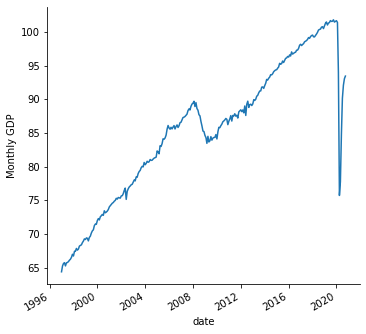

In [6]:
g = sns.relplot(x="date", y="Monthly GDP", kind="line", data=gdpDF)
g.fig.autofmt_xdate()
plt.show()

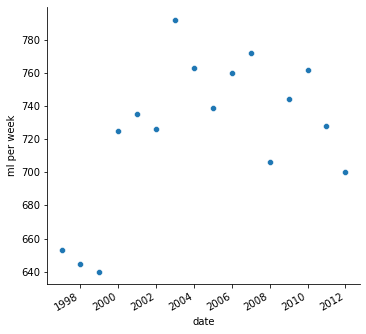

In [7]:
g = sns.relplot(x="date", y="ml per week", data=alcoholDF)
g.fig.autofmt_xdate()
plt.show()

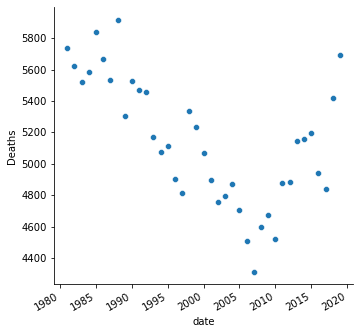

In [8]:
g = sns.relplot(x="date", y="Deaths", data=suicideDF)
g.fig.autofmt_xdate()
plt.show()

In [9]:
gdpSuicideDF = gdpDF.merge(suicideDF, on="date")
gdpSuicideDF.head()

,Month,Monthly GDP,date,Year,Deaths
0,1997JAN,64.3701,1997-01-01,1997,4816
1,1998JAN,66.7171,1998-01-01,1998,5339
2,1999JAN,69.1636,1999-01-01,1999,5235
3,2000JAN,71.9840,2000-01-01,2000,5070
4,2001JAN,74.0075,2001-01-01,2001,4896


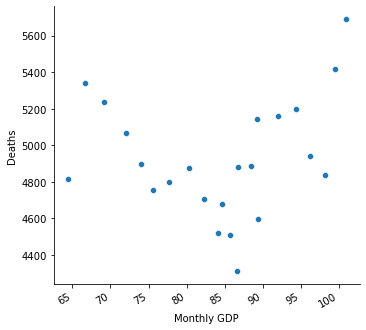

In [19]:
g = sns.relplot(x="Monthly GDP", y="Deaths", data=gdpSuicideDF)
g.fig.autofmt_xdate()
plt.show()

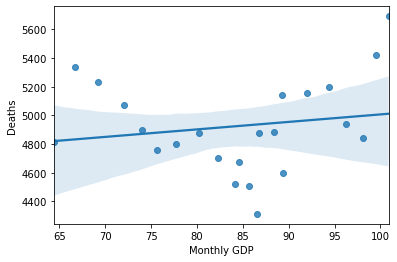

In [23]:
sns.regplot(x="Monthly GDP", y="Deaths", data=gdpSuicideDF)

In [33]:
X = np.array(gdpSuicideDF["Monthly GDP"]).reshape(-1,1)
y = gdpSuicideDF["Deaths"]

reg = LinearRegression().fit(X, y)
reg.intercept_

4484.296456915912

In [22]:
coeffSuicide = pearsonr(gdpSuicideDF["Monthly GDP"], gdpSuicideDF["Deaths"])
coeffSuicide

(0.16924178175990245, 0.44012270733382475)

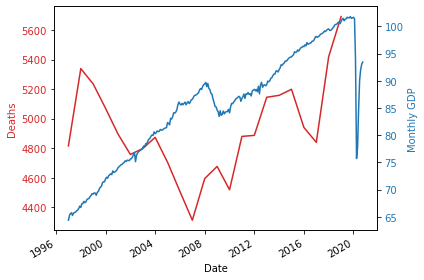

In [18]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Deaths', color=color)
ax1.plot(gdpSuicideDF["date"], gdpSuicideDF["Deaths"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Monthly GDP', color=color)  # we already handled the x-label with ax1
ax2.plot(gdpDF["date"], gdpDF["Monthly GDP"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.autofmt_xdate()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [11]:
gdpAlcoholDF = gdpDF.merge(alcoholDF, on="date")
gdpAlcoholDF["log ml per week"] = gdpAlcoholDF["ml per week"]
gdpAlcoholDF.head()

,Month,Monthly GDP,date,Year,ml per week
0,1997JAN,64.3701,1997-01-01,1997,653
1,1998JAN,66.7171,1998-01-01,1998,645
2,1999JAN,69.1636,1999-01-01,1999,640
3,2000JAN,71.9840,2000-01-01,2000,725
4,2001JAN,74.0075,2001-01-01,2001,735


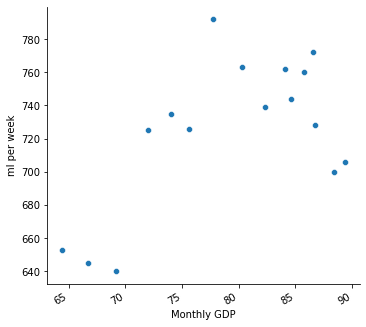

In [34]:
g = sns.relplot(x="Monthly GDP", y="ml per week", data=gdpAlcoholDF)
g.fig.autofmt_xdate()
plt.show()

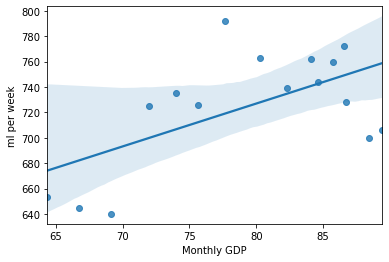

In [35]:
sns.regplot(x="Monthly GDP", y="ml per week", data=gdpAlcoholDF)

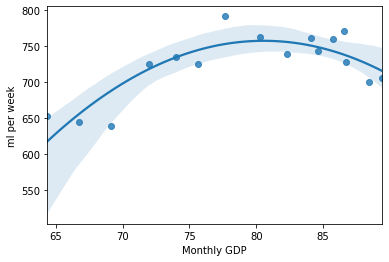

In [59]:
sns.regplot(x="Monthly GDP", y="ml per week", data=gdpAlcoholDF, order=2)
#plt.yscale('log')

In [36]:
coeffAlcohol = pearsonr(gdpAlcoholDF["Monthly GDP"], gdpAlcoholDF["ml per week"])
coeffAlcohol

(0.5983639614083163, 0.014339876756846033)

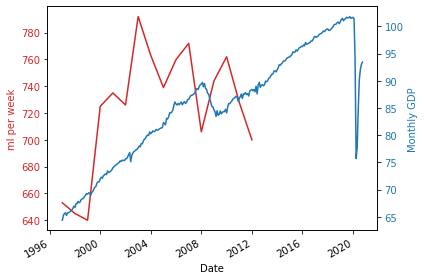

In [13]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('ml per week', color=color)
ax1.plot(gdpAlcoholDF["date"], gdpAlcoholDF["ml per week"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Monthly GDP', color=color)  # we already handled the x-label with ax1
ax2.plot(gdpDF["date"], gdpDF["Monthly GDP"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.autofmt_xdate()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [47]:
X = np.array(gdpAlcoholDF["Monthly GDP"]).reshape(-1,1)
y = gdpAlcoholDF["ml per week"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)


# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [2.841001]
Mean squared error: 1458.08
Coefficient of determination: 0.17


In [49]:
X = np.array(gdpAlcoholDF["Monthly GDP"]).reshape(-1,1)
y = gdpAlcoholDF["ml per week"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))

reg.fit(X_train, y_train)


y_pred = reg.predict(X_test)

# The coefficients
#print('Coefficients: \n', reg.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 1455.80
Coefficient of determination: 0.17


In [68]:
X = np.array(gdpAlcoholDF["Monthly GDP"]).reshape(-1,1)
y = gdpAlcoholDF["ml per week"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

poly = PolynomialFeatures(degree=2)
X_fit = poly.fit_transform(X_train)

X_fit_test = poly.fit_transform(X_test)

reg = LinearRegression().fit(X_fit, y_train)

y_pred = reg.predict(X_fit_test)


# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [  0.         154.43460287  -0.96057602]
Mean squared error: 3129.92
Coefficient of determination: -0.79


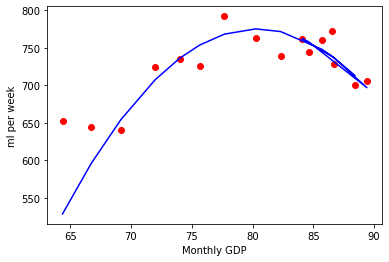

In [74]:
plt.scatter(X, y, color='red')
plt.plot(X, reg.predict(poly.fit_transform(X)), color='blue')
plt.xlabel('Monthly GDP')
plt.ylabel('ml per week')
plt.show()